In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import all libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Upload the Dataset:

In [3]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# DATA EXPLORATION:

In [4]:
pd.set_option('display.max_columns', None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_data.shape

(1460, 81)

In [8]:
train_data[train_data.duplicated()].count().sum()

0

<AxesSubplot:>

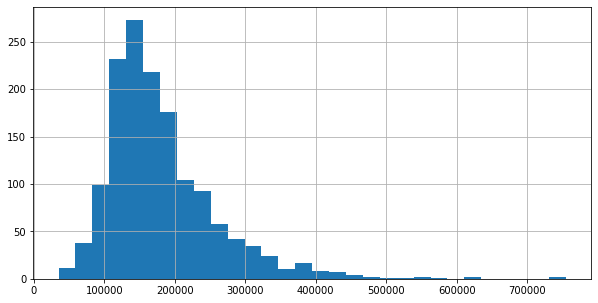

In [9]:
train_data['SalePrice'].hist(figsize=(10,5),bins=30, )

**ANÁLISE GRÁFICA - CORRELAÇÕES ENTRE AS VARIÁVEIS NUMÉRICAS**

Text(0.5, 1.0, 'House Prices - Correlation')

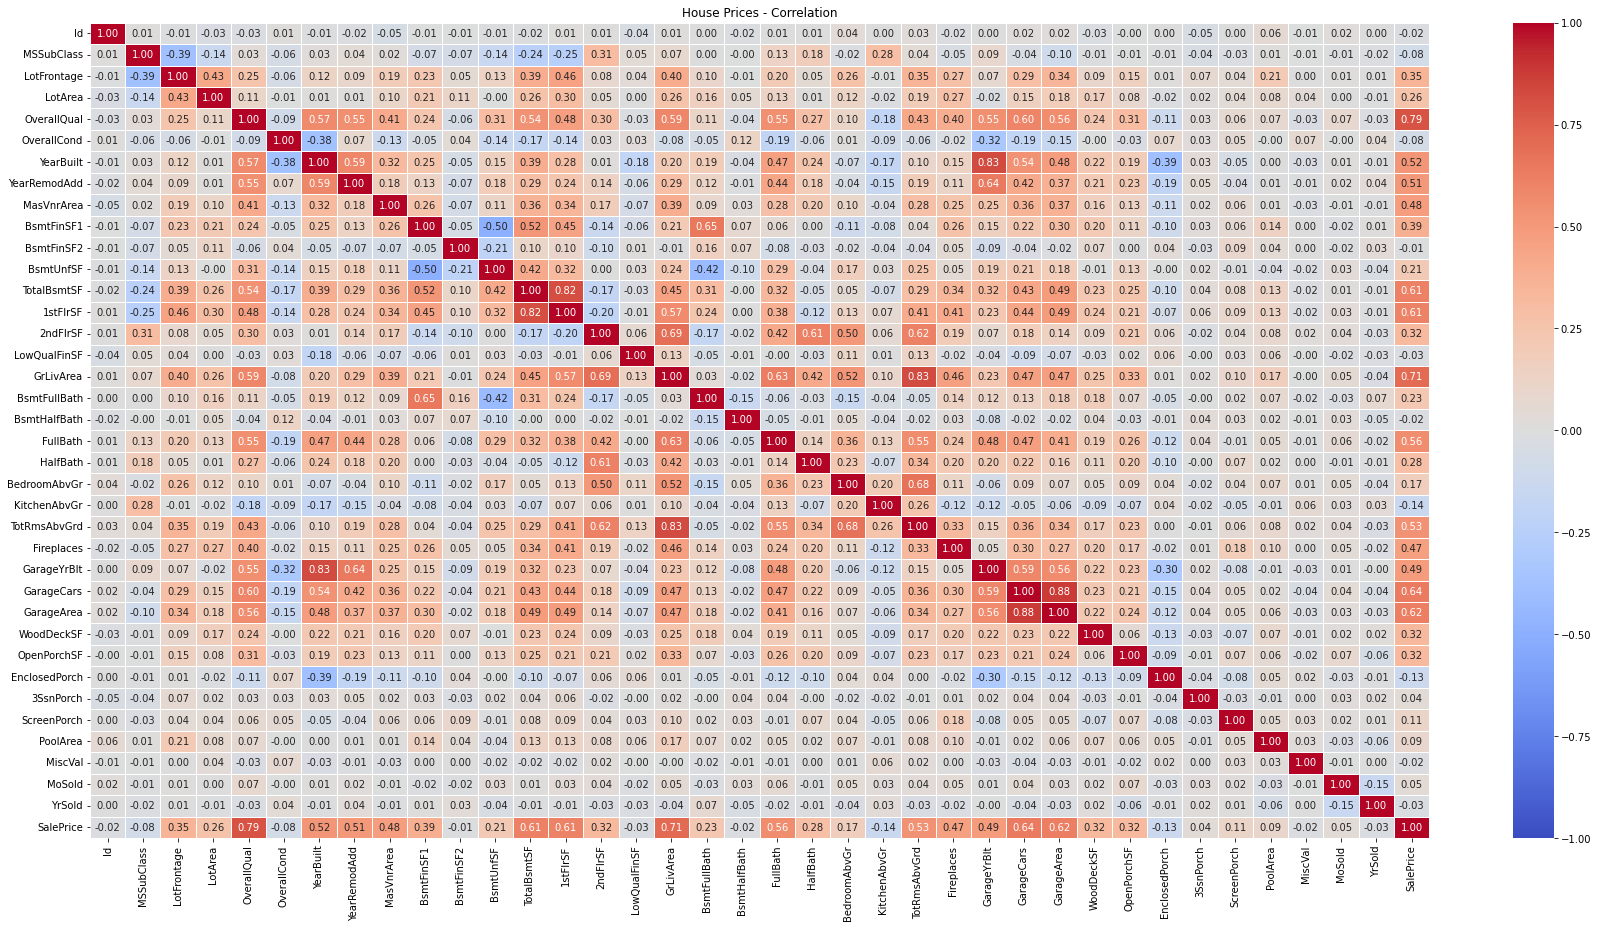

In [10]:
plt.figure(figsize=(30,15))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, linewidth=1, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('House Prices - Correlation')

**COMO SELECIONAR AS VARIÁVEIS COM MAIOR CORRELAÇÃO?**

Valores de Correlação:

0.9 para mais ou para menos indica uma correlação muito forte.

0.7 a 0.9 positivo ou negativo indica uma correlação forte.

0.5 a 0.7 positivo ou negativo indica uma correlação moderada.

0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

0 a 0.3 positivo ou negativo indica uma correlação desprezível.

**TORNANDO ALGUMAS DAS CORRELAÇÕES EM GRÁFICOS, PARA ANÁLISE VISUAL** 

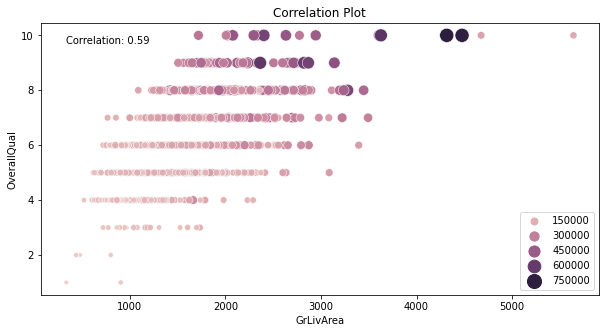

In [11]:
x= train_data['GrLivArea']
y= train_data['OverallQual']
plt.figure(figsize=(10,5))

sns.scatterplot(data=train_data, x=x, y=y, hue="SalePrice", size="SalePrice", sizes=(20, 200))
plt.legend(loc='lower right')

plt.title('Correlation Plot')
correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.show()

De modo geral, a qualidade geral do imóvel está positivamente correlacionada com Above grade (ground) living area square feet. Além disso, o valor do imóvel também aumenta com o aumento de ambas as variáveis.

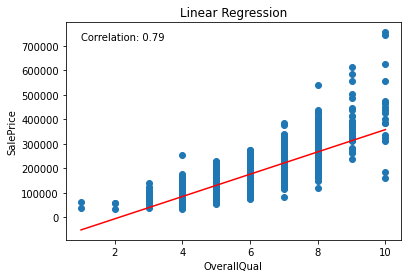

In [12]:
x = train_data['OverallQual']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior a qualidade geral do imóvel, maior o preço de venda. -- CORRELAÇÃO POSITIVA FORTE

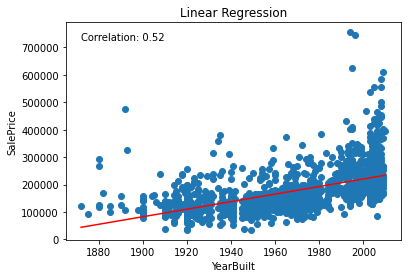

In [13]:
x = train_data['YearBuilt']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto mais recente a contrução do imóvel, maior o valor de venda-- CORRELAÇÃO POSITIVA MODERADA

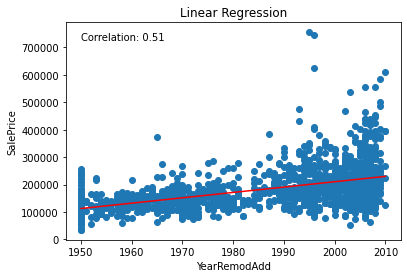

In [14]:
x = train_data['YearRemodAdd']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto mais recente a reforma no imóvel, maior o preço de venda. -- CORRELAÇÃO POSITIVA MODERADA

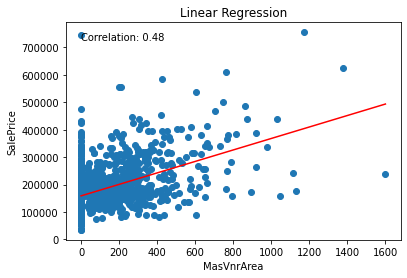

In [15]:
valid_data = train_data.dropna(subset=['MasVnrArea', 'SalePrice'])

x = valid_data['MasVnrArea']
y = valid_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')            
            
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior o Masonry veneer area in square feet, maior o preço de venda do imóvel. -- CORRELAÇÃO POSITIVA FRACA (dispersão maior dos dados)

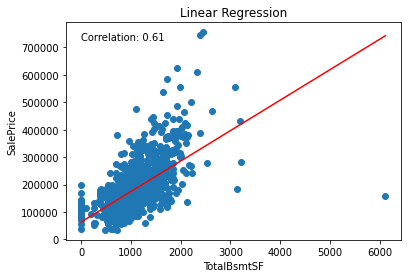

In [16]:
x = train_data['TotalBsmtSF']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior Total square feet of basement area, maior o preço de venda do imóvel -- CORRELAÇÃO POSITIVA MODERADA (outliers + dispersão dos dadosconforme aumenta o tamanho do porão)

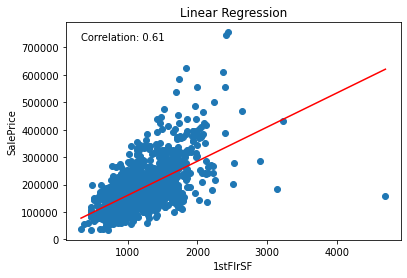

In [17]:
x = train_data['1stFlrSF']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior First Floor square feet, maior o preço de venda do imóvel -- CORRELAÇÃO POSITIVA MODERADA (outliers + dispersão conforme aumenta o tamanho do First floor)

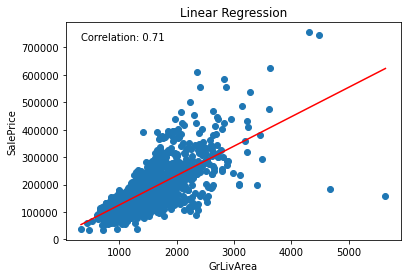

In [18]:
x = train_data['GrLivArea']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red') 

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior o Above grade (ground) living area square feet, maior o valor de venda do imóvel. -- CORRELAÇÃO POSITIVA FORTE

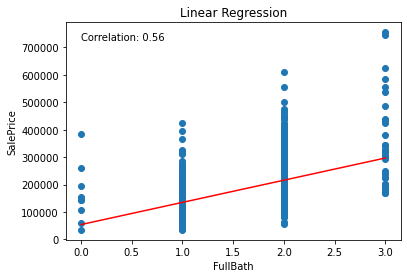

In [19]:
x = train_data['FullBath']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto mais banheiros completos, maior o preço de venda -- CORRELAÇÃO MODERADA

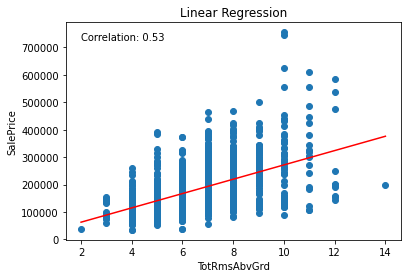

In [20]:
x = train_data['TotRmsAbvGrd']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto mais Rooms above ground, maior o preço de venda -- CORRELAÇÃO MODERADA

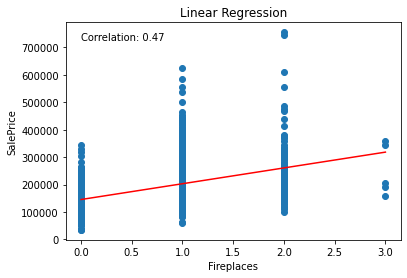

In [21]:
x = train_data['Fireplaces']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto mais lareiras, maior o preço de venda -- CORRELAÇÃO FRACA

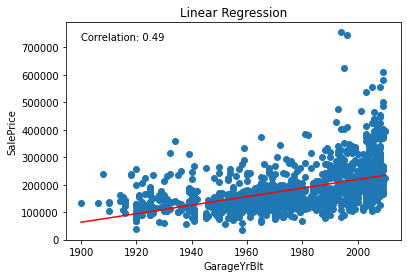

In [22]:
valid_data = train_data.dropna(subset=['GarageYrBlt', 'SalePrice'])

x = valid_data['GarageYrBlt']
y = valid_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')            
            
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto mais recente a construção da garagem, maior o preço de venda -- CORRELAÇÃO FRACA

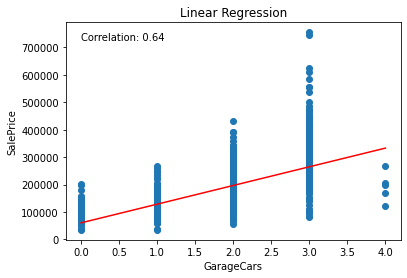

In [23]:
x = train_data['GarageCars']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior o epaço para carros na garagem, maior o preço de venda -- CORRELAÇÃO MODERADA

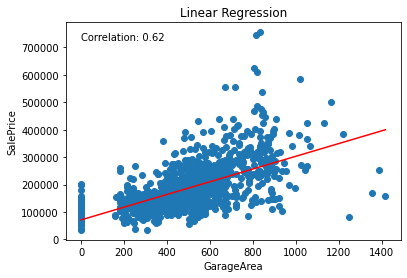

In [24]:
x = train_data['GarageArea']
y = train_data['SalePrice']

plt.scatter(x, y) 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

Quanto maior a área da garagem, maior o preço de venda -- CORRELAÇÃO MODERADA

**ESCOLHER ENTRE GRÁFICOS ISOLADOS OU EM UM PAIR PLOT???**

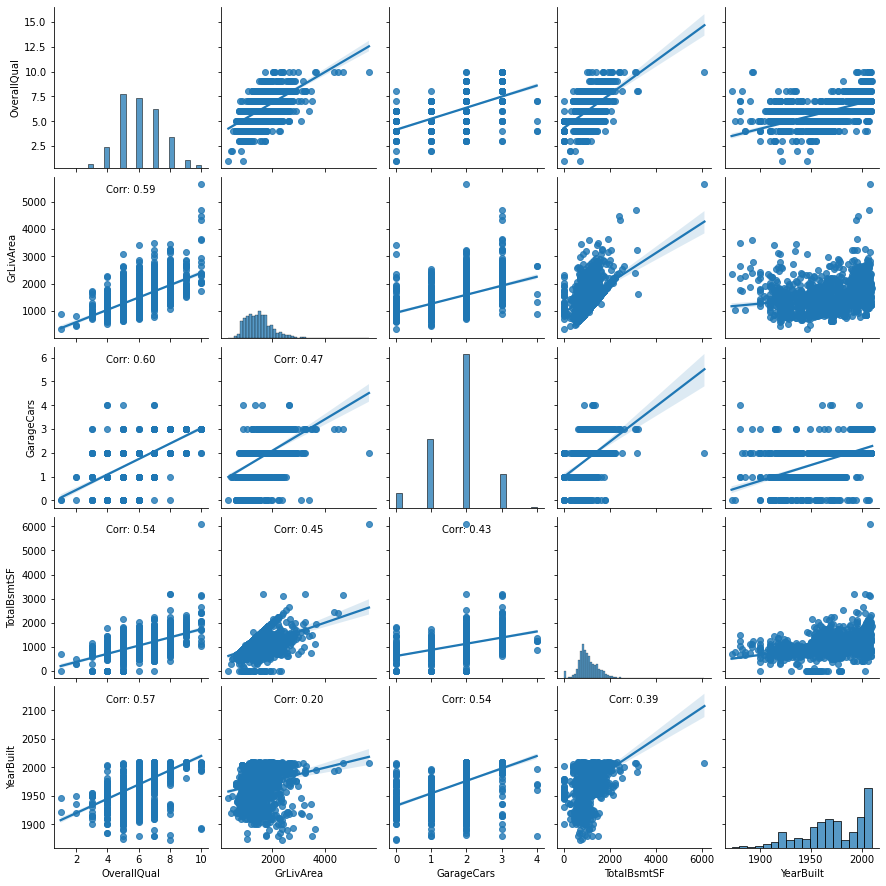

In [25]:
# Select variables that might be correlated with sale price
variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

# Create a pairplot with regression line and correlation values
pairplot = sns.pairplot(data=train_data, vars=variables, y_vars=['SalePrice'], kind='reg')

# Add correlation values to each plot
for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
    r = np.corrcoef(train_data[variables[i]], train_data[variables[j]])[0, 1]
    pairplot.axes[j, i].annotate(f'Corr: {r:.2f}', (0.5, 0.9), xycoords='axes fraction', ha='center')

plt.show()

ANÁLISE EXPLORATÓRIA:
- Valor de venda das casas por ano; OK
- Valor de venda das casas por região; OK
- Valor de venda das casas pelo total de área útil (GrLivArea: Above grade (ground) living area square feet); OK
- Valor de venda das casas por "idade"; OK
- Valor de venda das casas por "qualidade geral"; OK

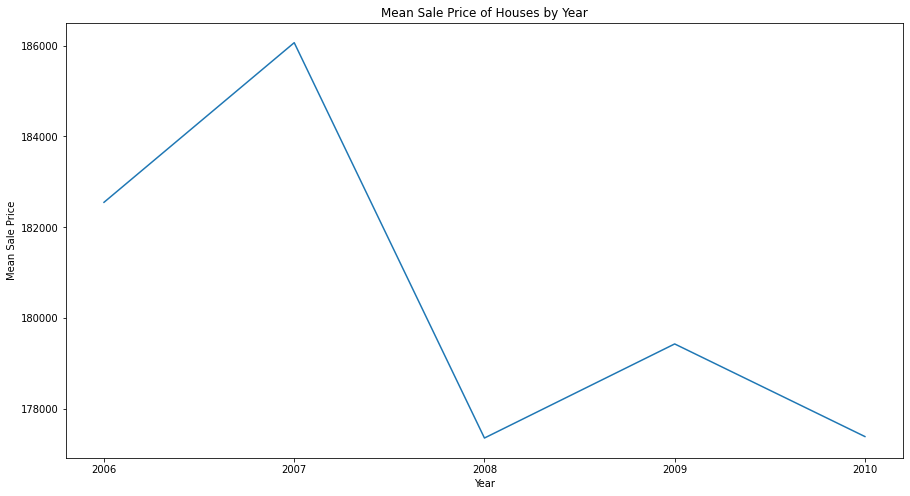

In [26]:
mean_prices = train_data.groupby('YrSold')['SalePrice'].mean()

plt.figure(figsize=(15, 8))

plt.plot(mean_prices.index, mean_prices.values)

plt.xlabel('Year')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price of Houses by Year')

# Format x-axis tick labels as integers
plt.xticks(mean_prices.index.astype(int))

plt.show()

**2008**: crise da bolha imobiliária nos EUA, conhecida também como a crise do *subprime*.

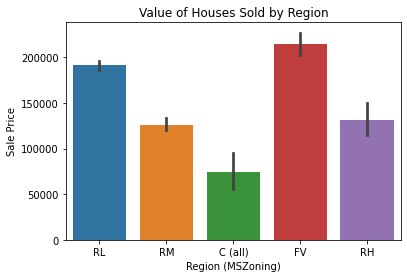

In [27]:
sns.barplot(data=train_data, x='MSZoning', y='SalePrice')

plt.xlabel('Region (MSZoning)')
plt.ylabel('Sale Price')
plt.title('Value of Houses Sold by Region')

plt.show()

COLOCAR LEGENDA DAS REGIÕES

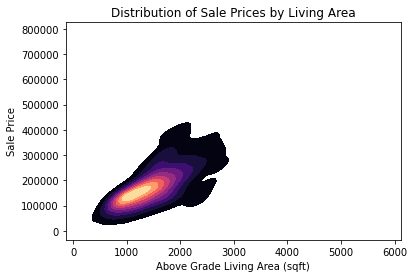

In [28]:
sns.kdeplot(data=train_data, x='GrLivArea', y='SalePrice', shade=True, cmap='magma')

plt.xlabel('Above Grade Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices by Living Area')

plt.show()

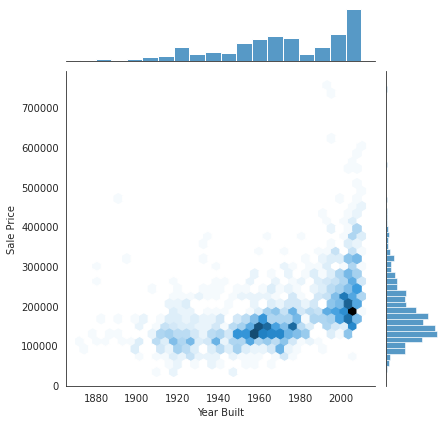

In [29]:
sns.set_style("white")  # Set the plot background to white

sns.jointplot(data=train_data, x="YearBuilt", y="SalePrice", kind="hex")

plt.xlabel('Year Built')
plt.ylabel('Sale Price')

plt.show()

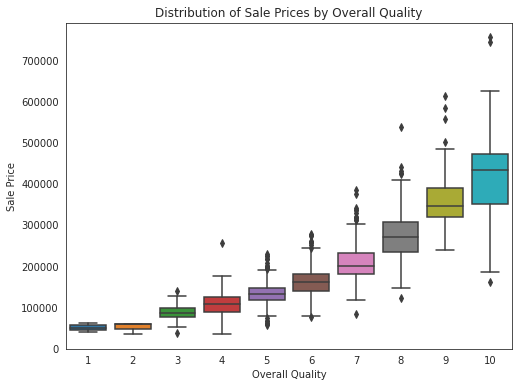

In [30]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=train_data, x='OverallQual', y='SalePrice')

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices by Overall Quality')

plt.show()

QUAL A HIPÓTESE DE ANALISAR ESSAS VARIÁVEIS?
CURVA EM LOG? TRANSFORMAÇÃO DOS DADOS?

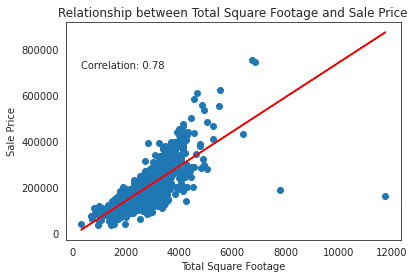

In [31]:
total_sqft = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']
sale_price = train_data['SalePrice']

plt.scatter(total_sqft, sale_price)
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.title('Relationship between Total Square Footage and Sale Price')

# Calculate regression line
regression_line = np.polyfit(total_sqft, sale_price, 1)
plt.plot(total_sqft, np.polyval(regression_line, total_sqft), color='red')

# Calculate correlation
correlation = np.corrcoef(total_sqft, sale_price)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(total_sqft.min(), sale_price.max(), correlation_text, ha='left', va='top')

plt.show()

A correlação entre a nova variável criada, fica POSITIVA E FORTE, os dados ficam menos dispersos (exceto por alguns outliers). Interessante utilizar essas variáveis em conjunto ao invés de separadas.

# DATA PREPARATION

QUAIS SÃO OS TIPOS DE VARIÁVEIS?

In [32]:
list(set(train_data.dtypes.tolist()))    

[dtype('float64'), dtype('O'), dtype('int64')]

Dividindo as variáveis em numéricas e categóricas:

In [33]:
numerical = pd.DataFrame(train_data, columns=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                                              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                                              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                                              'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
categorical = pd.DataFrame(train_data, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                                                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                                'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                                                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                                'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                                                'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                                'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                                                'SaleCondition'])

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'Kitchen

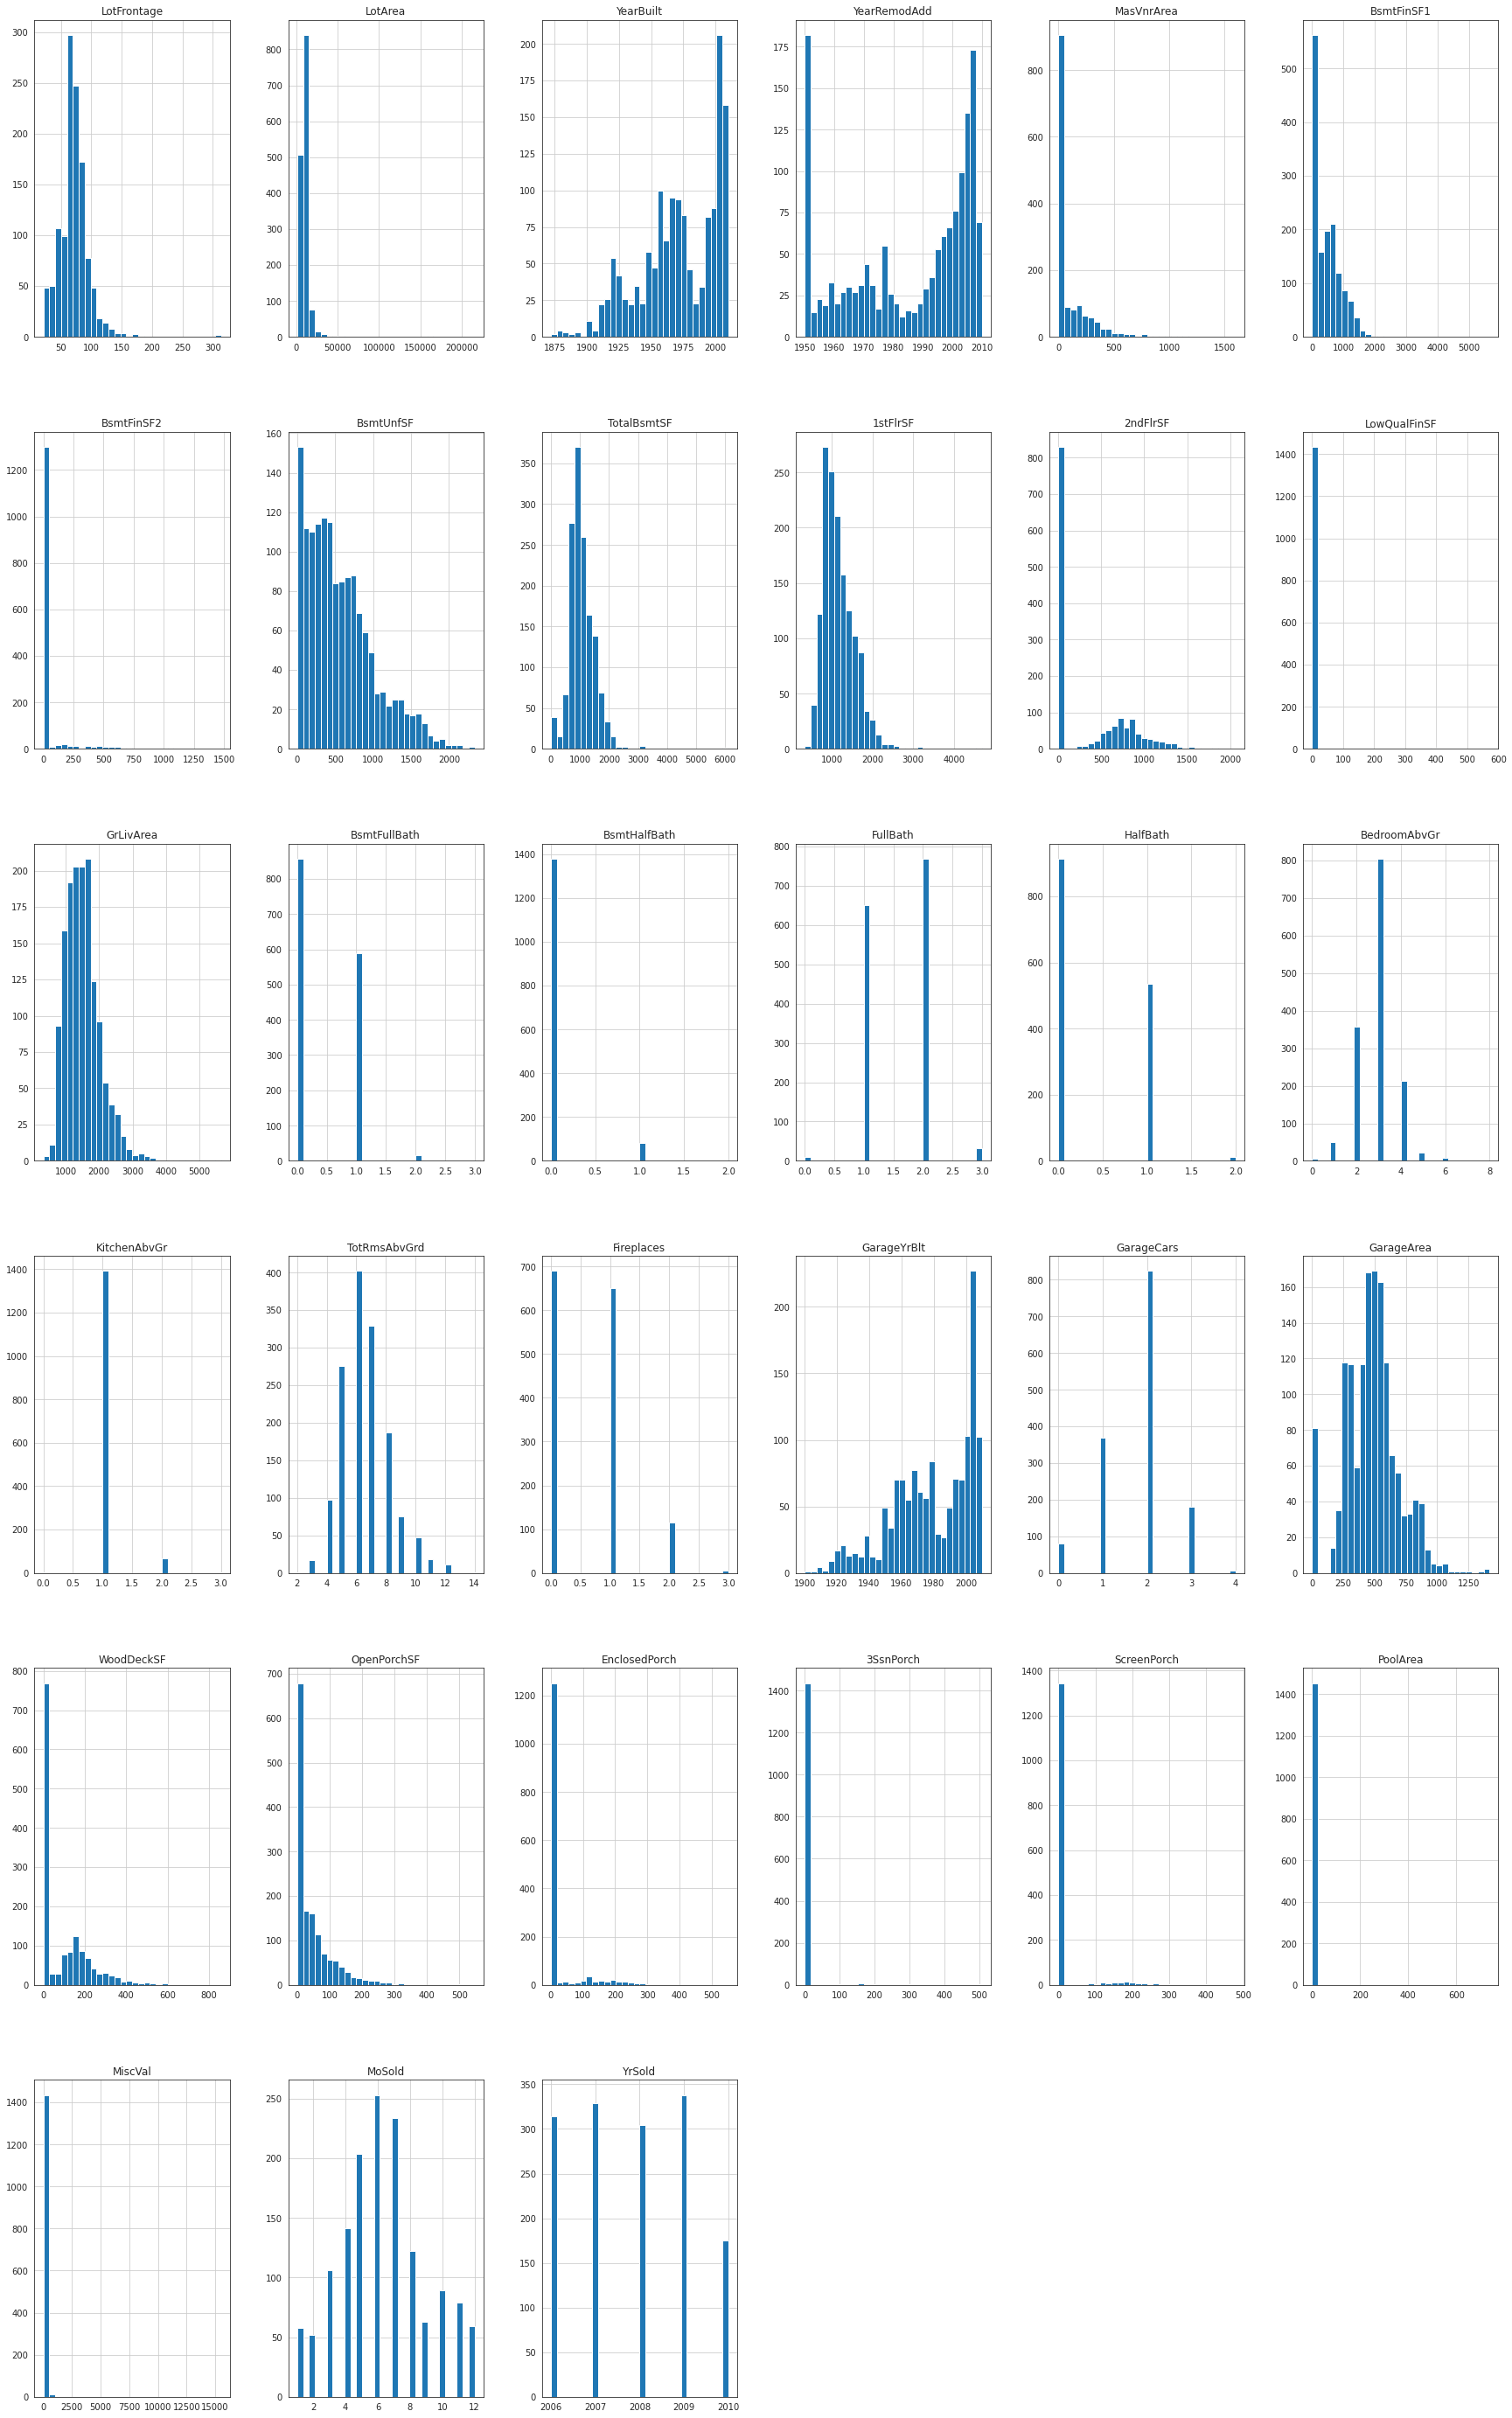

In [34]:
numerical.hist(figsize=(30,50),bins=30)

Com base na análise dos histogramas, decidiu-se por remover as variáveis que possivelmente teriam pouco impacto na análise estatística, por terem muitos valores em uma das categorias e pouquíssimos nas demais. Serão removidas as seguintes variáveis numéricas:

'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [35]:
categorical.shape[1] #quantas colunas?

46

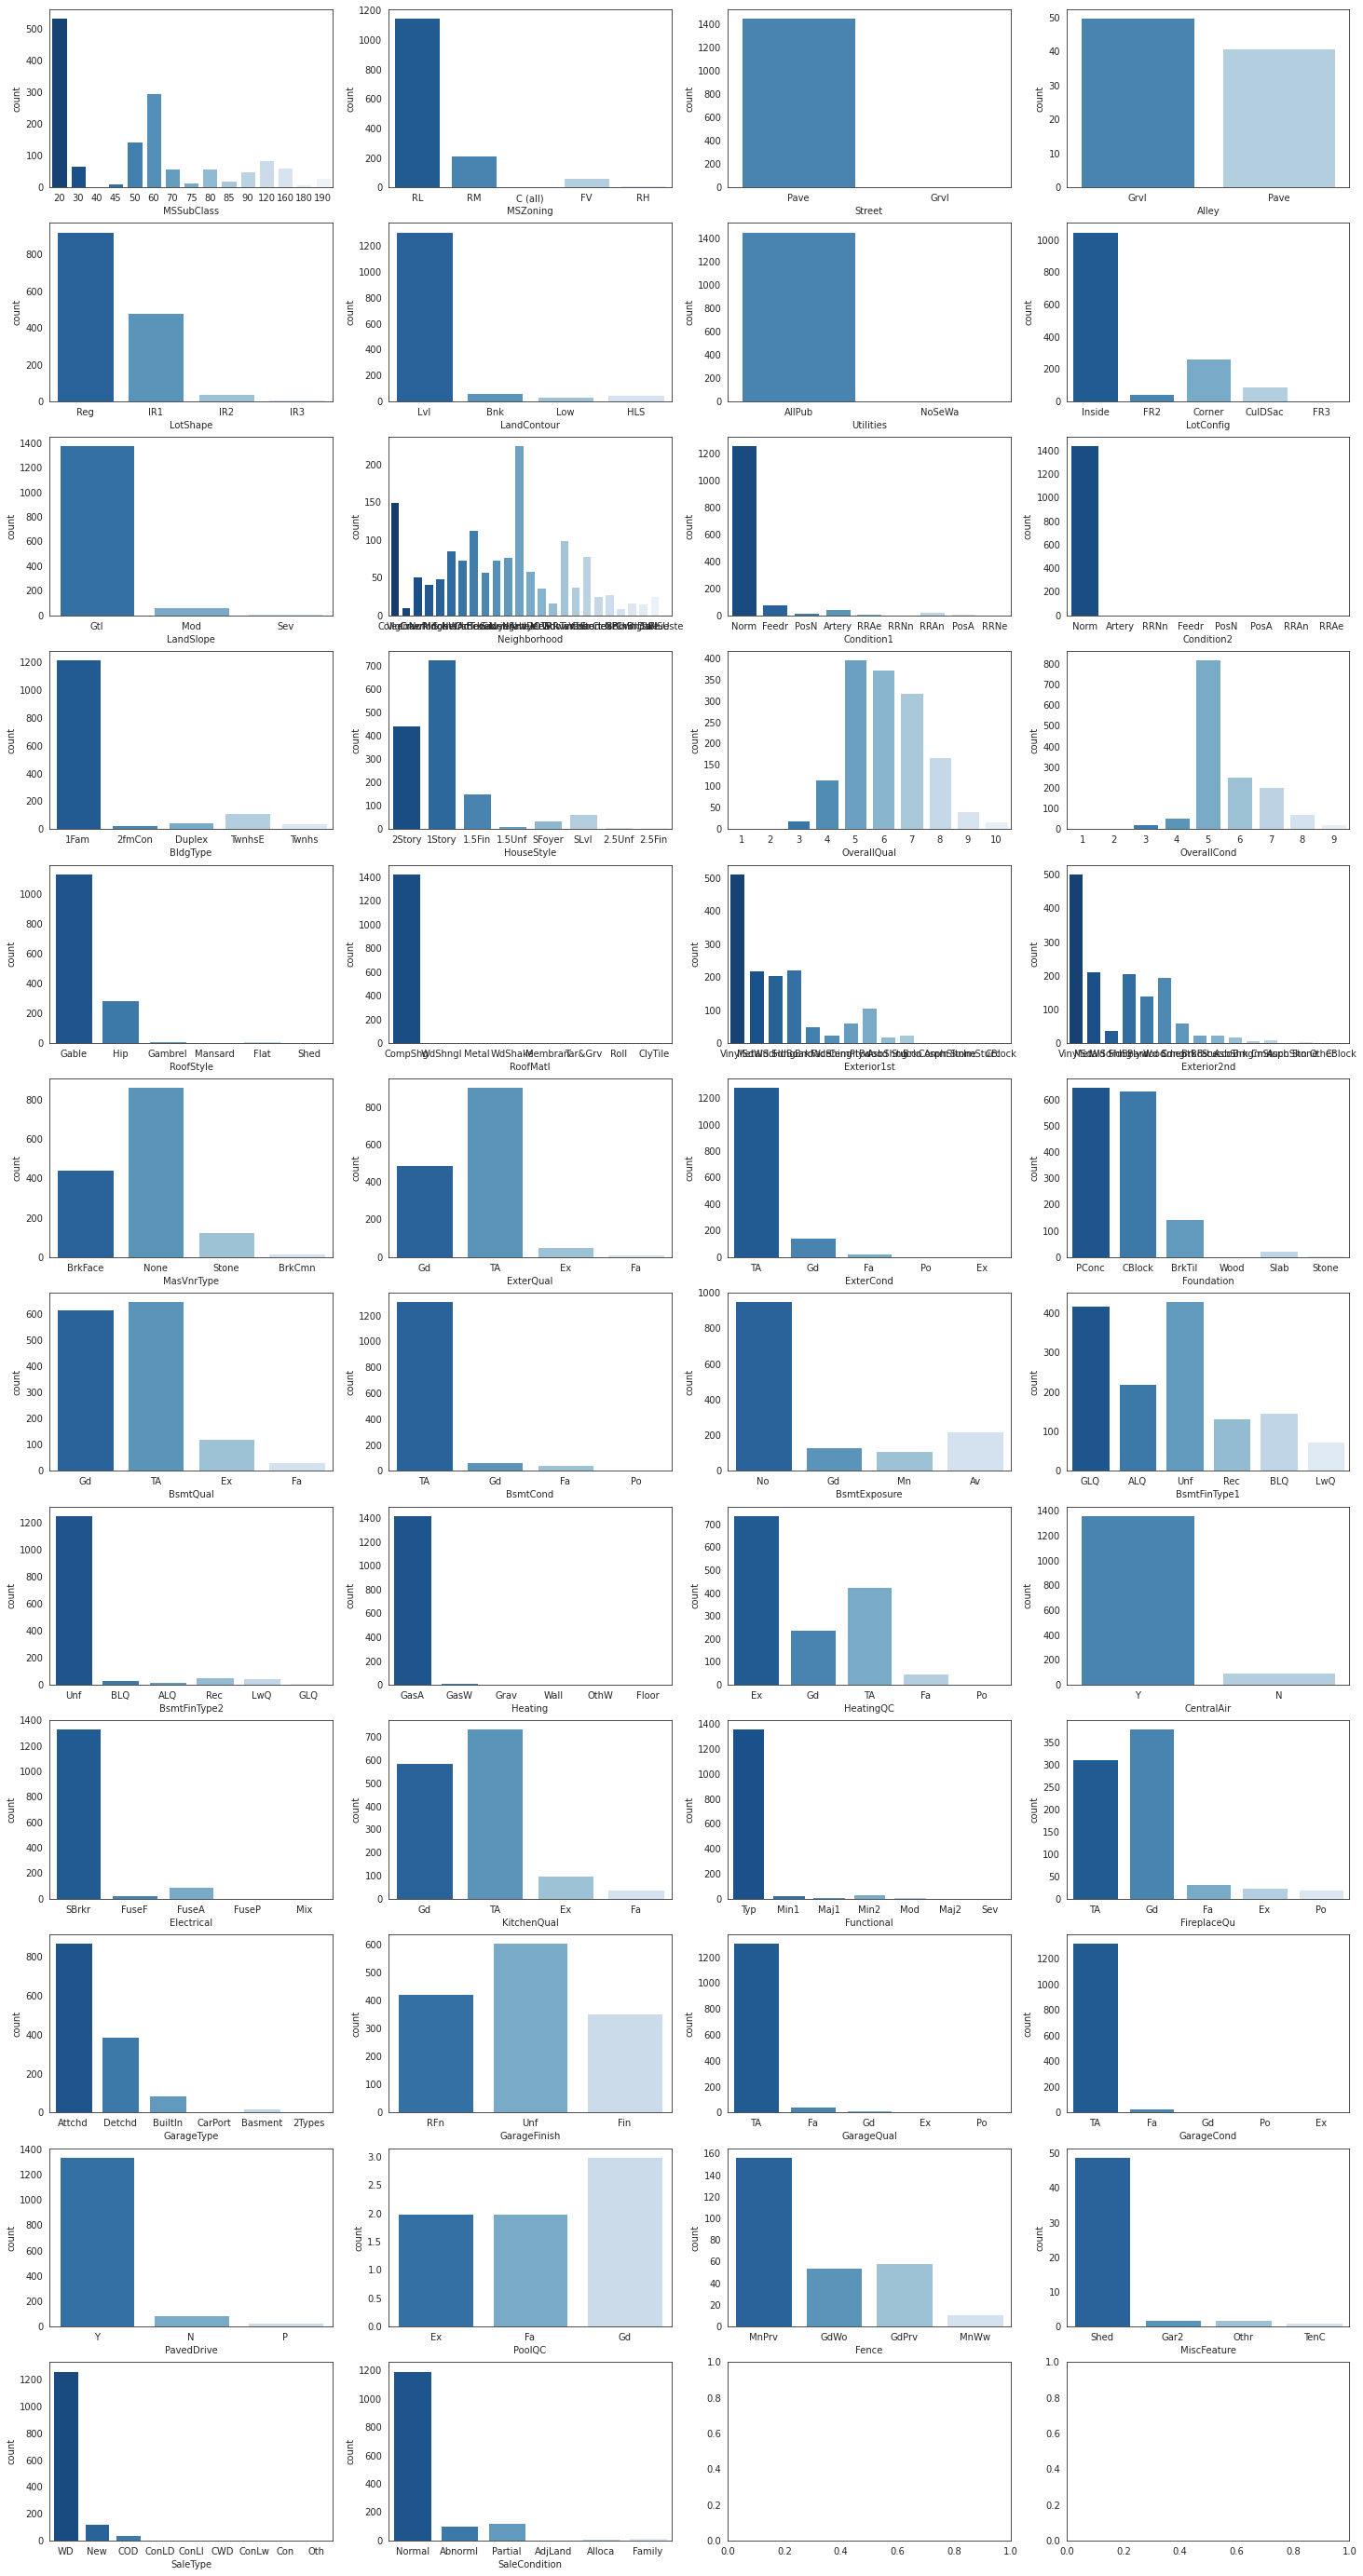

In [36]:
fig, ax = plt.subplots(12, 4, figsize=(25, 50))

for i, subplots in zip(categorical, ax.flatten()):  
  sns.countplot(data=categorical, x=categorical[i], ax=subplots, palette='Blues_r')

plt.show()

Com base na análise dos *countplots*, decidiu-se por remover as variáveis que possivelmente teriam pouco impacto na análise estatística, por terem muitos valores em uma das categorias e pouquíssimos nas demais. Serão removidas as seguintes variáveis categóricas:

'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'


<AxesSubplot:>

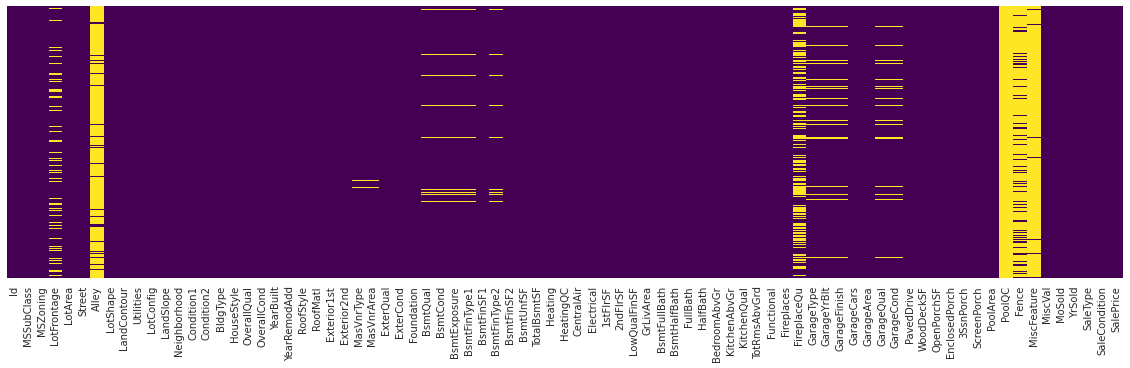

In [37]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Após a análise do *heatmap* acima, optou-se por remover as variáveis com muitos valores nulos e também a variável de identificação (Id), que não teria nenhum valor na análise.
*'Id', 'Alley', 'FireplaceQu', 'PoolQc', 'Fence', 'MiscFeature*.

Restam as seguintes variáveis com valores nulos:
*'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'*


**REMOVER:**
'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'


In [38]:
#remover colunas
del_col = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
           'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional',  'GarageQual', 'GarageCond',
           'PavedDrive', 'SaleType', 'SaleCondition']

train_data.drop(del_col,axis=1,inplace=True)

<AxesSubplot:>

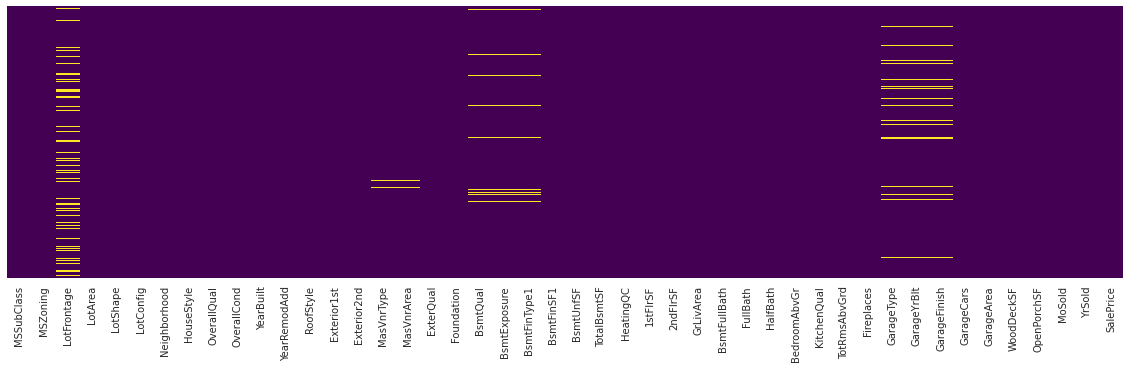

In [39]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
cols = pd.DataFrame(train_data, columns=['LotFrontage', 'MasVnrType', 'MasVnrArea',
                                         'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                                         'GarageType', 'GarageYrBlt', 'GarageFinish'])
                    
for c in cols:
    print(c,':', cols[c].isnull().sum())

LotFrontage : 259
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtExposure : 38
BsmtFinType1 : 37
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81


In [41]:
print('Missing data:')
for c in cols:
    print(c,':',round(((cols[c].isnull().sum())*100/len(train_data)),1),'%')

Missing data:
LotFrontage : 17.7 %
MasVnrType : 0.5 %
MasVnrArea : 0.5 %
BsmtQual : 2.5 %
BsmtExposure : 2.6 %
BsmtFinType1 : 2.5 %
GarageType : 5.5 %
GarageYrBlt : 5.5 %
GarageFinish : 5.5 %


**Missing values:** Valores ausentes na base de dados podem ocorrer por vários motivos, como questões de permissões, erros humanos, erros de código, etc. A maioria dos algoritmos de aprendizado de máquina não aceitam conjuntos de dados com valores ausentes. Há um consenso de que se uma feature tiver **mais que 20% dos dados faltantes em sua coluna, é melhor não utilizá-la** e entender porque esses valores estão faltando. Caso uma feature tenha **até 20% dos valores faltando, preencher esses dados com a média ou a mediana da variável. Quando for um valor categórico preencher com o valor categórico médio.** E quando se tem **menos de 2% dos dados de uma feature faltando, o mais indicado é deletar esses registros**, pois como são poucos, sua base de dados não vai diminuir muito, além de poder causar outros problemas.

In [42]:
alpha = 0.05
k2, p = stats.normaltest(train_data.LotFrontage, nan_policy='omit')

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print("p = {:g}".format(p))
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

p = 1.46816e-149
A Hipótese Nula pode ser rejeitada


In [43]:
alpha = 0.05
#k2, p = print([stats.normaltest(cols[i]) for i in cols])
k2, p = stats.normaltest(train_data.GarageYrBlt, nan_policy='omit')

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
print("p = {:g}".format(p))
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

p = 4.35899e-22
A Hipótese Nula pode ser rejeitada


Valor de p <= alpha (0,05) significa que o valor de p é menor ou igual a 0,05, então rejeita-se H0 e se assume que a amostra não tem uma distribuição normal. Por isso utilizamos a mediana para preencher os valores faltantes nas variáveis testadas.

In [44]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)

Para preencher as demais variáveis (categóricas), usaremos a moda.

In [45]:
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0], inplace=True)
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0], inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0], inplace=True)
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0], inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0], inplace=True)

MasVnrType, MasVnrArea - deletar registros faltantes

In [46]:
train_data.dropna(axis=0, inplace=True)

<AxesSubplot:>

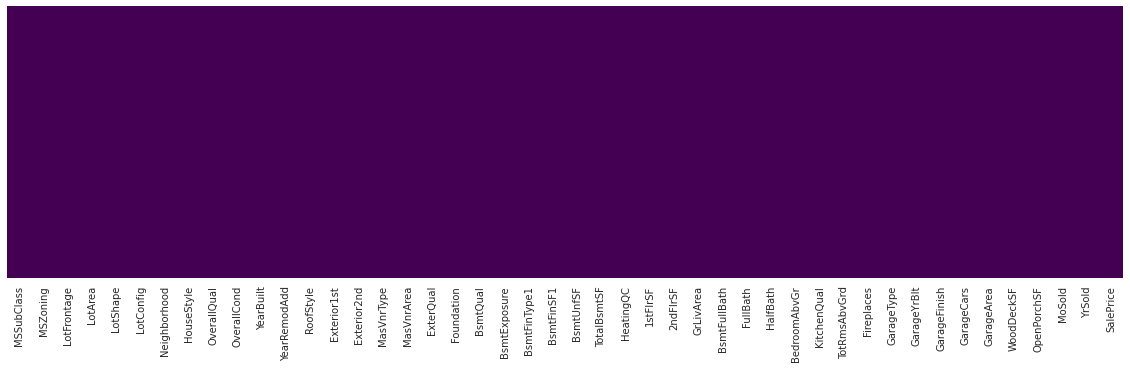

In [47]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**TREATMENT OF CATEGORICAL VARIABLES:**

DESCREVER PQ ESCOLHI O LABEL ENCODER VS ONE HOT ENCODER

Fazer isso afeta de alguma forma o modelo?

In [48]:
from sklearn.preprocessing import LabelEncoder
# Criar uma lista de variáveis ordinais:
ordinal_cols = ['LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
'HeatingQC', 'KitchenQual', 'GarageFinish', 'RoofStyle']
enc_var = pd.DataFrame()
label_encoder = LabelEncoder()
for col in ordinal_cols:
    enc_var[col] = label_encoder.fit_transform(train_data[col])

In [49]:
enc_var.head()

,LotShape,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,RoofStyle
0,3,6,4,2,2,3,2,0,2,1,1
1,3,5,7,3,2,1,0,0,3,1,1
2,0,6,4,2,2,2,2,0,2,1,1
3,0,6,4,3,3,3,0,2,2,2,1
4,0,7,4,2,2,0,2,0,2,1,1


In [50]:
train_data.drop(ordinal_cols,axis=1,inplace=True)

In [51]:
train_data = pd.concat([train_data, enc_var], axis=1)

In [52]:
pd.set_option('display.max_columns', None)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,LotShape,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,RoofStyle
0,60.0,RL,65.0,8450.0,Inside,CollgCr,2Story,2003.0,2003.0,VinylSd,VinylSd,BrkFace,196.0,PConc,706.0,150.0,856.0,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,8.0,0.0,Attchd,2003.0,2.0,548.0,0.0,61.0,2.0,2008.0,208500.0,3.0,6.0,4.0,2.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0
1,20.0,RL,80.0,9600.0,FR2,Veenker,1Story,1976.0,1976.0,MetalSd,MetalSd,None,0.0,CBlock,978.0,284.0,1262.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,6.0,1.0,Attchd,1976.0,2.0,460.0,298.0,0.0,5.0,2007.0,181500.0,3.0,5.0,7.0,3.0,2.0,1.0,0.0,0.0,3.0,1.0,1.0
2,60.0,RL,68.0,11250.0,Inside,CollgCr,2Story,2001.0,2002.0,VinylSd,VinylSd,BrkFace,162.0,PConc,486.0,434.0,920.0,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,6.0,1.0,Attchd,2001.0,2.0,608.0,0.0,42.0,9.0,2008.0,223500.0,0.0,6.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0
3,70.0,RL,60.0,9550.0,Corner,Crawfor,2Story,1915.0,1970.0,Wd Sdng,Wd Shng,None,0.0,BrkTil,216.0,540.0,756.0,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,7.0,1.0,Detchd,1998.0,3.0,642.0,0.0,35.0,2.0,2006.0,140000.0,0.0,6.0,4.0,3.0,3.0,3.0,0.0,2.0,2.0,2.0,1.0
4,60.0,RL,84.0,14260.0,FR2,NoRidge,2Story,2000.0,2000.0,VinylSd,VinylSd,BrkFace,350.0,PConc,655.0,490.0,1145.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,9.0,1.0,Attchd,2000.0,3.0,836.0,192.0,84.0,12.0,2008.0,250000.0,0.0,7.0,4.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0


In [53]:
#nominal categorical variables - One-Hot Encoder
nominal_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']
# Aplicamos o get_dummies. A explicação para o parâmetro drop_first será dada abaixo.
train_data = pd.get_dummies(train_data, columns=nominal_cols, drop_first = True)
train_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,LotShape,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,RoofStyle,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,2.0,2008.0,208500.0,3.0,6.0,4.0,2.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,5.0,2007.0,181500.0,3.0,5.0,7.0,3.0,2.0,1.0,0.0,0.0,3.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,9.0,2008.0,223500.0,0.0,6.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,2.0,2006.0,140000.0,0.0,6.0,4.0,3.0,3.0,3.0,0.0,2.0,2.0,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,12.0,2008.0,250000.0,0.0,7.0,4.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1

fazer um distinct da coluna para ver se não tinha erro de digitação em uma das categorias

<AxesSubplot:>

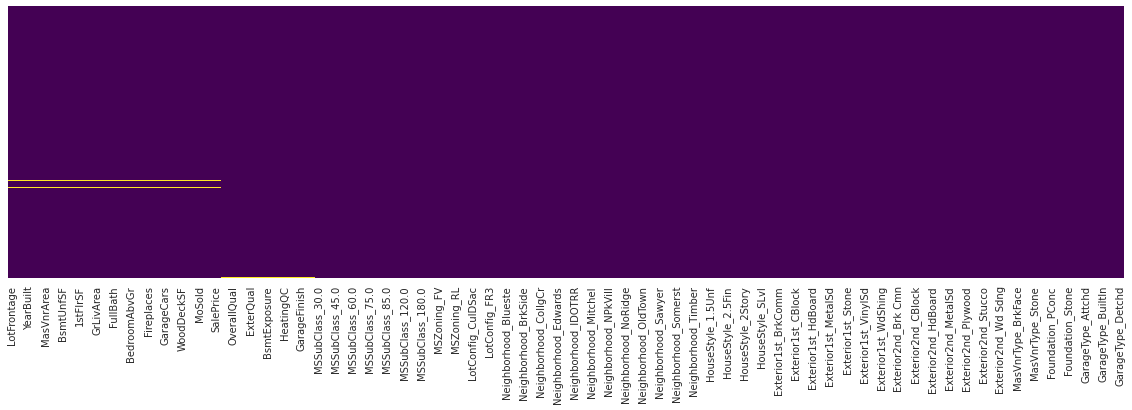

In [54]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
train_data.dropna(axis=0, inplace=True)

<AxesSubplot:>

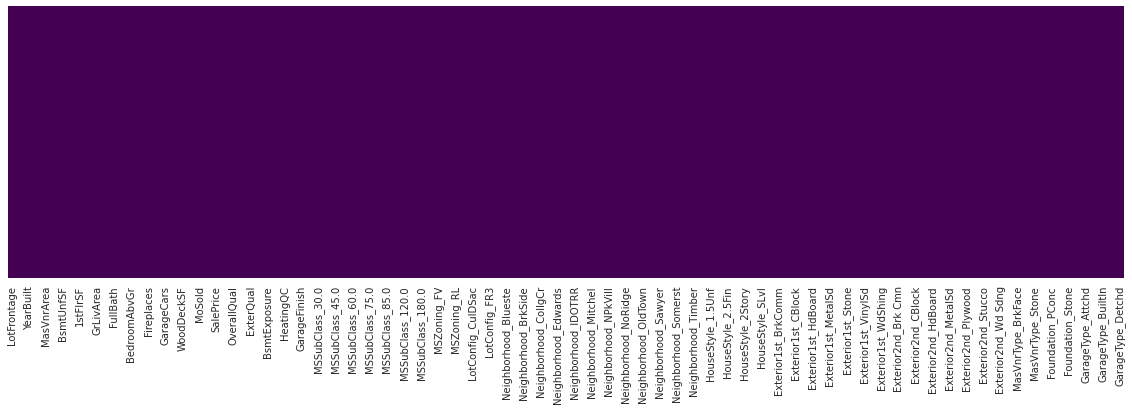

In [56]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# FEATURE ENGINEERING

In [57]:
train_data['TotalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']

In [58]:
train_data.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis=1, inplace=True)

In [59]:
train_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,LotShape,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,RoofStyle,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,TotalSF
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,1710.0,1.0,2.0,1.0,3.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,2.0,2008.0,208500.0,3.0,6.0,4.0,2.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2566.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,0.0,2.0,0.0,3.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,5.0,2007.0,181500.0,3.0,5.0,7.0,3.0,2.0,1.0,0.0,0.0,3.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2524.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,1786.0,1.0,2.0,1.0,3.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,9.0,2008.0,223500.0,0.0,6.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2706.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,1717.0,1.0,1.0,0.0,3.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,2.0,2006.0,140000.0,0.0,6.0,4.0,3.0,3.0,3.0,0.0,2.0,2.0,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2473.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,2198.0,1.0,2.0,1.0,4.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,12.0,2008.0,250000.0,0.0,7.0,4.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,3343.0


****-----------------------------------****

# MACHINE LEARINING

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**REGRESSÃO LINEAR**

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
#print the intercept
print(lm.intercept_)

-502845.3187102305


In [67]:
#pd.set_option('display.max_columns', None)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LotFrontage,-114.522445
LotArea,0.346303
YearBuilt,252.052465
YearRemodAdd,326.180947
MasVnrArea,44.470303
...,...
GarageType_Basment,34383.080818
GarageType_BuiltIn,49818.675622
GarageType_CarPort,35870.917800
GarageType_Detchd,42724.907043


In [68]:
predictions = lm.predict(X_test)

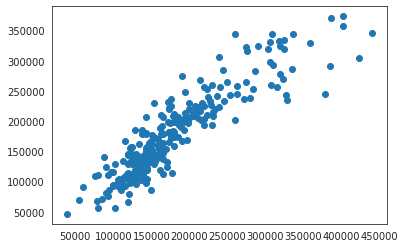

In [69]:
plt.scatter(y_test,predictions)

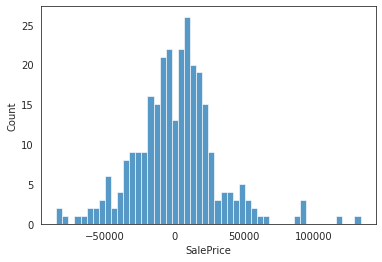

In [70]:
sns.histplot((y_test-predictions),bins=50);

In [71]:
from sklearn import metrics

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21782.134335363127
MSE: 888154086.2013185
RMSE: 29801.914136533553


qual é o percentual com relação ao valor de venda das casas

**RANDOM FOREST**

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
# Define the target variable
target_variable = 'SalePrice'

In [75]:
# Split the data into features (X) and target (y)
X = train_data.drop(target_variable, axis=1)
y = train_data[target_variable]

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Create the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

In [78]:
# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Make predictions on the test data
predictions = random_forest.predict(X_test)

In [80]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 18295.11044982699
MSE: 1050310325.9000223
RMSE: 32408.49157088343
